In [38]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('dark')

import cv2

def rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def bgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def disp(img, title='', s=8, vmin=None, vmax=None):
    plt.figure(figsize=(s,s))
    plt.axis('off')
    if vmin is not None and vmax is not None:
        plt.imshow(img, cmap='gray', vmin=vmin, vmax=vmax)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

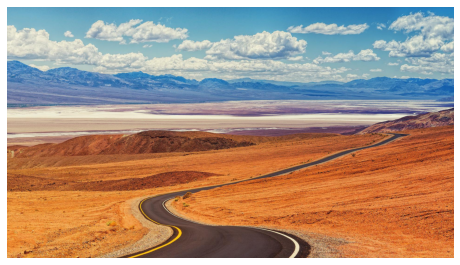

In [39]:
img_1 = rgb(cv2.imread('Source.jpg'))
img_2 = rgb(cv2.imread('Reference.jpg'))
cat = rgb(cv2.imread('cat.png'))
dogs = rgb(cv2.imread('dogs.png'))
sunset = rgb(cv2.imread('sunset.png'))
tea = rgb(cv2.imread('tea.png'))
disp(img_1)

In [40]:
a = np.array([10,10,10,10,2,3,3,3,4,4,4,4,5])
np.unique(a, return_counts=True, return_inverse=True)
a.size

13

In [41]:
def match_cumulative_cdf(source, template):
    src_values, src_unique_indices, src_counts = np.unique(
        source.ravel(),
        return_inverse=True,
        return_counts=True)
    tmpl_values, tmpl_counts = np.unique(template.ravel(), return_counts=True)

    # calculate normalized quantiles for each array
    src_quantiles = np.cumsum(src_counts) / source.size
    tmpl_quantiles = np.cumsum(tmpl_counts) / template.size

    interp_a_values = np.interp(src_quantiles, tmpl_quantiles, tmpl_values)
    return interp_a_values[src_unique_indices].reshape(source.shape)

In [42]:
def histogram_matching(img_1, img_2):
    img_result = np.zeros_like(img_1)
    for channel in range(img_result.shape[2]):
        matched_channel = match_cumulative_cdf(img_1[:,:,channel], img_2[:,:,channel])
        img_result[:,:,channel] = matched_channel
    return img_result

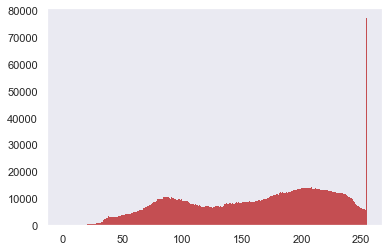

In [43]:
plt.hist(img_1[:,:,0].ravel(), 255, linewidth=0.0, fc='r');

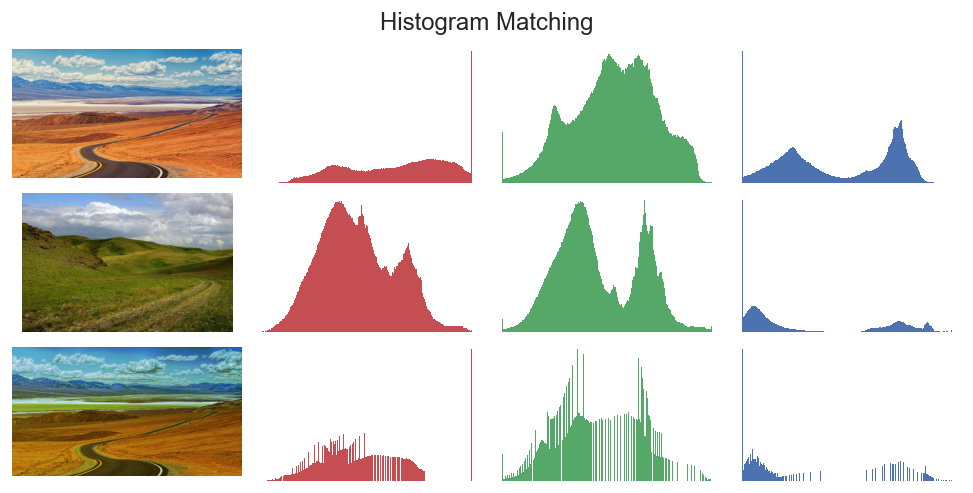

In [44]:
matched = histogram_matching(img_1, img_2)
cv2.imwrite("matched.jpg", bgr(matched))

fig, axs = plt.subplots(3,4, figsize=(8,4), constrained_layout=True)
fig.dpi=120
images = [img_1, img_2, matched]
fig.suptitle("Histogram Matching")
for ax in axs.ravel():
    ax.axis('off')

for i in range(3):
    axs[i][0].imshow(images[i])
    axs[i][1].hist(images[i][:,:,0].ravel(), 255, linewidth=0.0, fc='r');
    axs[i][2].hist(images[i][:,:,1].ravel(), 255, linewidth=0.0, fc='g');
    axs[i][3].hist(images[i][:,:,2].ravel(), 255, linewidth=0.0, fc='b');

plt.savefig("Histogram_matching.jpg")


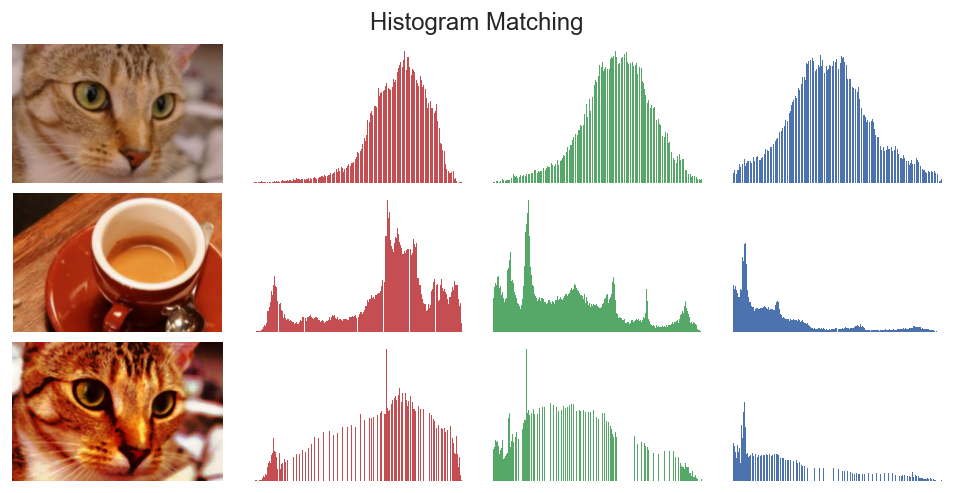

In [45]:
matched = histogram_matching(cat, tea)
cv2.imwrite("matched2.jpg", bgr(matched))

fig, axs = plt.subplots(3,4, figsize=(8,4), constrained_layout=True)
fig.dpi=120
images = [cat, tea, matched]
fig.suptitle("Histogram Matching")
for ax in axs.ravel():
    ax.axis('off')

for i in range(3):
    axs[i][0].imshow(images[i])
    axs[i][1].hist(images[i][:,:,0].ravel(), 255, linewidth=0.0, fc='r');
    axs[i][2].hist(images[i][:,:,1].ravel(), 255, linewidth=0.0, fc='g');
    axs[i][3].hist(images[i][:,:,2].ravel(), 255, linewidth=0.0, fc='b');

plt.savefig("Histogram_matching2.jpg")


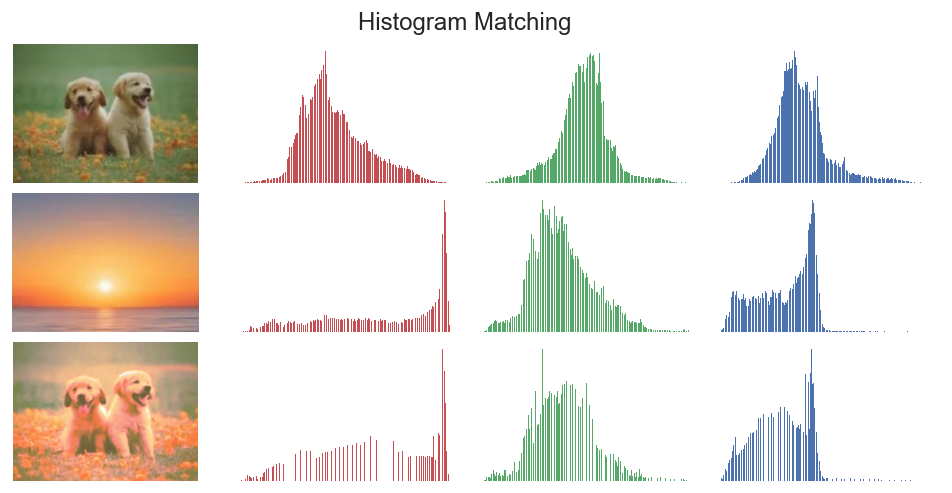

In [37]:
matched = histogram_matching(dogs, sunset)
cv2.imwrite("matched3.jpg", bgr(matched))

fig, axs = plt.subplots(3,4, figsize=(8,4), constrained_layout=True)
fig.dpi=120
images = [dogs, sunset, matched]
fig.suptitle("Histogram Matching")
for ax in axs.ravel():
    ax.axis('off')

for i in range(3):
    axs[i][0].imshow(images[i])
    axs[i][1].hist(images[i][:,:,0].ravel(), 255, linewidth=0.0, fc='r');
    axs[i][2].hist(images[i][:,:,1].ravel(), 255, linewidth=0.0, fc='g');
    axs[i][3].hist(images[i][:,:,2].ravel(), 255, linewidth=0.0, fc='b');

plt.savefig("Histogram_matching3.jpg")


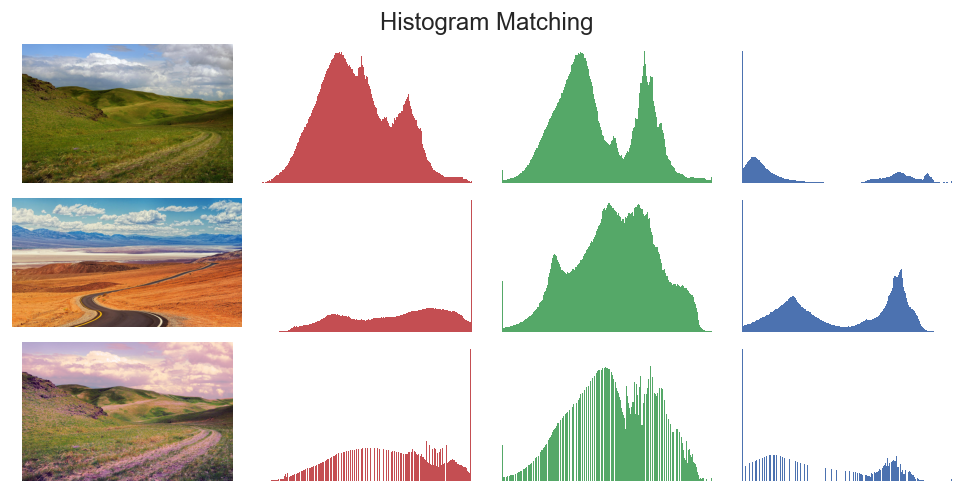

In [48]:
matched = histogram_matching(img_2, img_1)
cv2.imwrite("matched4.jpg", bgr(matched))

fig, axs = plt.subplots(3,4, figsize=(8,4), constrained_layout=True)
fig.dpi=120
images = [img_2, img_1, matched]
fig.suptitle("Histogram Matching")
for ax in axs.ravel():
    ax.axis('off')

for i in range(3):
    axs[i][0].imshow(images[i])
    axs[i][1].hist(images[i][:,:,0].ravel(), 255, linewidth=0.0, fc='r');
    axs[i][2].hist(images[i][:,:,1].ravel(), 255, linewidth=0.0, fc='g');
    axs[i][3].hist(images[i][:,:,2].ravel(), 255, linewidth=0.0, fc='b');

plt.savefig("Histogram_matching4.jpg")
